# ALGORITMO DE APRENDIZAJE DEL PERCEPTRÓN
Una vez visto en clase el algoritmo de aprendizaje del perceptrón, vamos a implementarlo en Python
y a usarlo para clasificar flores del dataset Iris cuyos datos vimos en la unidad 1 y que están
disponibles en el fichero **iris.data**

## PASO 1: IMPLEMENTA EN PYTHON EL PERCEPTRÓN.

Escribe este código en el fichero **Perceptron.py** que define un objeto perceptrón en lenguaje Python.
Cuando lo tengas, crearemos uno, lo entrenaremos usando su método **fit()** para que aprenda a
clasificar y lo usaremos para hacer predicciones con su método **predict()**. Recuerda que en Python
añadimos un subrayado a una variable para que se convierta en una variable del objeto que no se
creará hasta que sea inicializada

In [15]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [16]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, semilla=1):
        self.eta = eta
        self.n_iter = n_iter
        self.semilla = semilla
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.semilla)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errores_ = []
        for _ in range(self.n_iter):
            errores = 0
            for xi, target in zip(X, y):
                incremento = self.eta * (target - self.predict(xi))
                self.w_[1:] += incremento * xi
                self.w_[0] += incremento
                errores += int(incremento != 0.0)
            self.errores_.append(errores)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))


np.float64(0.0)

**Preguntas sobre el código:**
Usando esta implementación del perceptrón , podemos crear nuevos objetos perceptrón indicando su
propio ratio de aprendizaje eta y el número de iteraciones máximas en las que aprender que es el
número de épocas (repasos que da a los datos de entrenamiento). Con el método **fit()**, inicializamos
los pesos en **self.w_** a un vector de dimensiones m+1, donde m es el número de características del
dataset, le añadimos una porque el **self.w_[0]**, representa el bias. <br> <br>
Observa también que este vector se inicializa con pequeños números aleatorios a partir de una
distribución normal de media 0 y desviación estándar de 0.01 llamando a la función
**rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])**, donde **rgen()** es un generador de
números pseudoaleatorios de NumPy. <br>

## PREGUNTA 1: 
¿Porqué no inicializar los pesos de la neurona directamente todos a 0? <br>
O Porque el learning rate también se queda a 0. <br>
<span style="color:#6CFF36;">X</span> Porque el vector de pesos w representa una línea recta y si inicialmente es 0, cuando falla al
predecir y actualiza, al multiplicarlo, cambia su tamaño pero nunca su dirección.

Si la trigonometría te es familiar, considera un vector **v1 = [1 2 3]**, donde el ángulo entre **v1** y otro
vector **v2 = 0.5 v1** debería ser exactamente 0, como puedes comprobar en el siguiente código (**v2**
tiene la misma dirección que **v1** pero la mitad de su tamaño). Lo puedes probar con este código: <br> <br>

>>> v1 = np.array( [1, 2, 3] )
>>> v2 = 0.5 * v1
>>> np.arccos( v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)) ) <br> <br>

La llamada a **np.arccos()** es la inversa del coseno (el arco o ángulo cuyo coseno indicas) y
**np.linalg.norm()** es una función que calcula la longitud de un vector. Por ese motivo decidimos
inicializar por primera vez los pesos con valores aleatorios que sigan una distribución normal de una
media y desviación pequeñas. Estos valores son pequeños y arbitrarios, pero así evitamos que queden
todos a cero. <br> <br>
Tras inicializar los pesos, el método **fit()** recorre los ejemplos del dataset **X**, que le pasamos para
entrenarlo y se encarga de realizar una predicción y actualizar los pesos. La función **np.dot()** usada
en el método **net_input()** calcula el vector producto escalar **w<sup>T </sup>x .** <br> <br>
En vez de usar el código de numpy para calcular el producto dot de dos vectores **v1** y **v2** llamando al
método **v1.dot(v2)** o **np.dot(v1, v2)**, podríamos hacernos nuestro propio código: <br><br>

**sum([i * j for i, j in zip(v1, v2)])** <br> <br>

Sin embargo es preferible usar numPy en vez de las estructuras clásicas de bucles del lenguaje porque
estas operaciones están vectorizadas<sup>1</sup>
 en la librería.



## PASO 2: PREPARAR EL DATASET IRIS.

Para comprender bien como trabajan los algoritmos, muchas veces, como en esta ocasión,
restringiremos la cantidad de características usadas. En este ejercicio nos quedaremos con dos
dimensiones (dos características): la longitud de los sépalos y la longitud de los pétalos de cada flor.
Esto nos permitirá visualizar de manera sencilla la frontera de decisión que encuentra el algoritmo. <br><br>
Además, nos quedaremos con solamente dos de los posibles resultados o clases que aparecen en el
dataset Iris: la **clase Setosa** y la **clase versicolor.** Pero aunque hagamos esto en este ejercicio, no creas
que el perceptrón tiene estas restricciones, las imponemos nosotros por simplificarnos el resultado,
pero el algoritmo perfectamente podría trabajar con cientos de características (dimensiones) y muchas
clases. <br><br>
Una forma de permitir clasificar muchas clases posibles sería usar la técnica **“Uno contra todos o uno contra el resto”(One-versus-Rest: OvR en inglés).**  Permite usar un clasificador binario (sabe clasificar
en 2 clases) para clasificar en más de dos clases. Lo que se hace es considerar la clase positiva como

----------------------------

1. Vectorización: significa que las operaciones aritméticas elementales se aplican a todos los elementos de un
array. Si ejecutamos las mismas operaciones sobre cada elemento del array uno a uno, en vez de especificar esas
operaciones y que el array las aplique, no estaremos usando las mejoras de las actuales CPU’s que tienen
arquitecturas **SIMD (Single Instruction Multiple Data)**. NumPy usa librerías muy optimizadas de código
escritas en C como **Basic Linear Algebra Subprograms (BLAS)** y **Linear Algebra Package (LAPACK)** en
Fortran.


una de las posibilidades y el resto de las clases como la otra posibilidad. Luego repite el proceso para
cada una de las posibles clases y ya tienes un clasificador multiclase. <br><br>
Primero, usaremos la librería pandas para cargar el dataset Iris a partir del fichero preguntando al
usuario la ruta:


In [17]:
# ## PASO 2 PREPARAR EL DATASET

# Leer el dataset <lugar> puede sr una ruta o una URL

df = pd.read_csv('recursos/U02_P01/iris.data', header=None, encoding='utf-8')
print(f'----- Ultimos 5 ejemplos:\n {df.tail()}')

----- Ultimos 5 ejemplos:
        0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


## PREGUNTA 2: 
¿Para qué sirve el parámetro **header** del método **read_csv()**?
<span style="color: #6CFF36;">
controla cómo se interpreta la fila de encabezados (o nombres de columnas) en el archivo CSV que se está leyendo.</style>

Ahora extraemos los primeros 100 ejemplos que se corresponden con las primeras 50 Iris-setosa y las
50 Iris-versicolor y convertimos estos nombres en valores (labels) **+1 (versicolor)** y **-1 (setosa)**
que asignamos a un vector y, donde los valores se corresponden a los de un método del objeto
**DataFrame** de pandas se corresponden con la representación de numPy. <br><br>

De igual manera, quitamos la primera característica o columna **(sepal length)** y la tercera
característica o columna **(petal length)** de estos 100 ejemplos de entrenamiento y los asignamos en
la matriz **X**, que podemos visualizar con con un gráfico de tipo **scatter plot:**

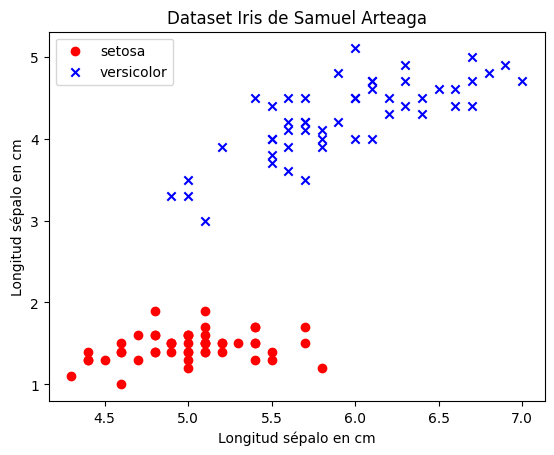

In [18]:
y = df.iloc[0:100, 4].values # seleccionar ejemplos de setosa y versicolor
y = np.where(y == 'Iris-setosa', -1, 1) # codificarlos en +1 (Iris-Versicolor)
X = df.iloc[0:100, [0, 2]].values # extraer longitud de sépalos y pétalos
# Dibuja los datos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel("Longitud sépalo en cm")
plt.ylabel("Longitud sépalo en cm")
plt.legend(loc='upper left')
plt.title(loc='center', label='Dataset Iris de Samuel Arteaga')
plt.show()

El gráfico muestra la distribución de los ejemplos de las flores a lo largo de dos ejes (dimensiones):
longitud de los sépalos y longitud de los pétalos. Es un subespacio de dos dimensiones en el que
podemos visualizar como es posible separar las flores setosa de las Versicolor trazando una línea recta
que las separe. 

## PREGUNTA 3: 
Pon tu nombre y primer apellido al título del gráfico tal y como te propone el código y
entrega una captura del gráfico con el nombre **u02_p01_03.png.**

## PREGUNTA 4: 
Viendo como están distribuidas las flores del dataset y teniendo en cuenta que el perceptrón es un clasificador lineal, ¿debería ser capaz de encontrar una línea que separe perfectamente los dos tipos o clases de flores? Traza una línea que separe ambas clases usando un
programa de edición de imágenes y la entregas como **u02_p01_04.png.**
¿Puedes decirme qué linea es? Darme aproximadamente su ecuación.

<span style="color: #6CFF36;">y=2.6x−10.3</span>

## PASO 3: CREAR Y ENTRENAR UN PERCEPTÓN.
Es el momento de entrenar al perceptrón. Es decir, de enseñarle ejemplos que hemos extraído del
dataset Iris. Iremos generando un gráfico que cuente los fallos que va cometiendo en cada época (si
fuese un estudiante intentando aprender unos apuntes, a cada repaso que le da a los datos se le llama
época). Así podremos comprobar si a medida que estudia va aprendiendo a separar bien (clasificar)
las flores:

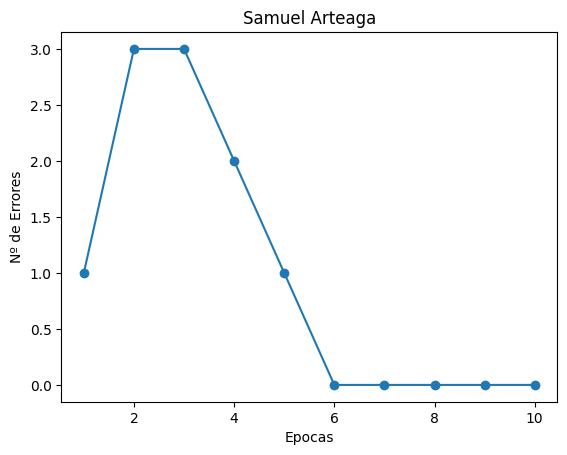

In [19]:
# ## PASO 3: ENTRENAR AL PERCEPTRÓN
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errores_) + 1), ppn.errores_, marker='o')
plt.xlabel('Epocas')
plt.ylabel('Nº de Errores')
plt.title('Samuel Arteaga')
plt.show()

## PREGUNTA 5: 
Pon tu nombre y primer apellido al título del gráfico tal y como te propone el código y
entrega una captura del gráfico con el nombre U02_P01_05.png

## PREGUNTA 6: 
¿Sería cierto decir que durante el entrenamiento en la época 2 y 3 es cuando comete más errores el modelo? <br>
<span style="color:#6CFF36;">X</span> Sí. <br>
O No. <br>
Marca la época en que comienza a converger el modelo? <br>
O 2 <br>
O 4 <br>
<span style="color:#6CFF36;">X</span> 6 <br>
O 8 <br>
Si bajas el learning rate a 0.01 (el parámetro eta) ¿El modelo converge? <br>
O Antes. <br>
O Más lentamente. <br>
<span style="color:#6CFF36;">X</span> No converge salvo que aumentes las iteraciones. <br>
Marca la afirmación correcta sobre este gráfico que acabamos de generar: <br>
<span style="color:#6CFF36;">X</span> Muestra como es la frontera de decisión de los datos cuando la aprende. <br>
O Sirve vigilar durante el entrenamiento, la cantidad de errores que va cometiendo. <br>
Al acabar de entrenar la cantidad de errores que comete es 0. ¿Significa que tenemos un modelo
perfecto? <br>
O Sí. Como no comete errores, lo hemos creado con un rendimiento inmejorable. <br>
<span style="color:#6CFF36;">X</span> No. Necesitamos saber como se comporta con datos que no ha usado para entrenar. <br>



## PASO 4: GRAFICAR EL RESULTADO.
Vamos a implementar una pequeña función que nos ayude a visualizar la frontera de decisión de
dataset bidimensionales. Volvemos a dejar el código con el learning rate a 0.1. <br><br>
Primero definimos un número de colores y marcadores para crear un mapa de color desde la lista de
colores con **ListedColormap.** Luego calculamos los valores mínimo y máximo de las dos características
y usamos estos vectores para crear un par de arrays rejilla **xx1** y **xx2** con la función **meshgrid()** de numpy. <br><br>

Una vez que el perceptrón está entrenado como un clasificador de dos dimensiones, necesitamos
descomponer la rejilla de arrays y crear una matriz que tenga el mismo número de columnas que el
subconjunto de entrenamiento para poder usar el método **predict()** para predecir las etiquetas de las
clases z de los correspondientes puntos de la rejilla. <br><br>

Después de transformar la estructura de las clases predichas de z en una rejilla con las mismas
dimensiones de **xx1** y **xx2**, podemos dibujar el contorno con la función **contour()** de matplotlib que
mapea las diferentes regiones de decisión a diferentes colores para cada clase predicha en la rejilla.


In [20]:
# ## PASO 4: función para dibujar regiones de decisión
def plot_regiones(X, y, clasificador, resolucion=0.02):
    marcadores = ('s', 'x', 'o', '^', 'v')
    colores = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colores[len(np.unique(y))])
    # Dibujar la superficie de decision
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucion),
                           np.arange(x2_min, x2_max, resolucion))
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # Dibujar la clase de los ejemplos
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colores[idx], marker=marcadores[idx],
                    label=cl)

Por último hacemos una llamada a la función para generar el gráfico:


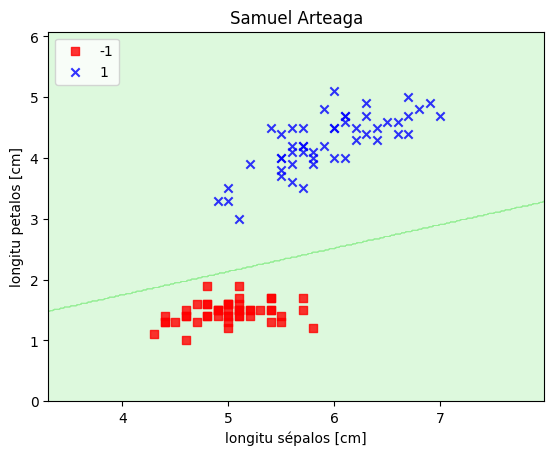

In [21]:
plot_regiones(X, y, clasificador=ppn)
plt.xlabel('longitu sépalos [cm]')
plt.ylabel('longitu petalos [cm]')
plt.legend(loc='upper left')
plt.title('Samuel Arteaga')
plt.show()

## PREGUNTA 7: 
Pon tu nombre y primer apellido al título del gráfico y entrega una captura del gráfico con el nombre u02_p01_07.png